# Info

# Import lib

In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler




%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Loading the data

In [74]:
df = pd.read_csv('train.csv')

In [75]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Cleaning data 

In [ ]:
Check the columns 

In [76]:
df.columns = df.columns.str.replace( '/', '_' ).str.replace( ' ', '_' ).str.replace( '.', '_' ).str.lower().str.strip()


C:\Users\mesha\AppData\Local\Temp/ipykernel_26296/3764328618.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace( '/', '_' ).str.replace( ' ', '_' ).str.replace( '.', '_' ).str.lower().str.strip()


In [80]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# df.dtypes

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached_on_time_y_n  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [77]:
#df.str.replace([ ' ','NaN', 'Na', '#', '?', '/'], np.nan).isna().sum()
df.isna()


,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False,False,False
10995,False,False,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df[df.isna() == '#']

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.isna().sum()

id                     0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached_on_time_y_n    0
dtype: int64

# EDA

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

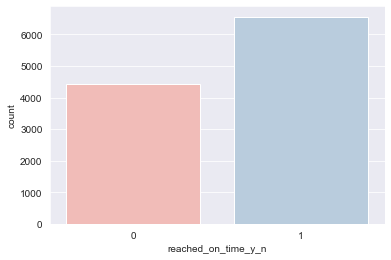

In [144]:
#Target
#(#where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.)
sns.set_style('darkgrid')
sns.countplot( x = 'reached_on_time_y_n', data = df, palette = 'Pastel1' );



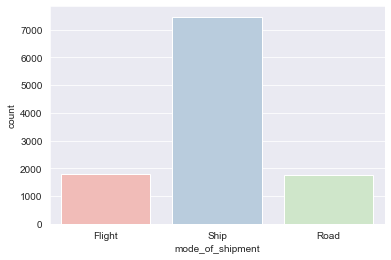

In [101]:
sns.set_style('darkgrid')
sns.countplot( x = 'mode_of_shipment', data = df, palette = 'Pastel1' );

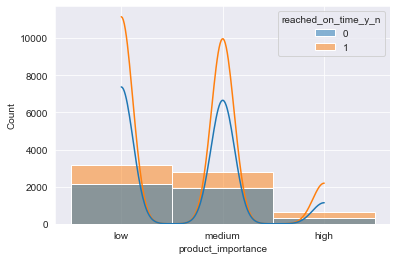

In [127]:
sns.histplot( x = 'product_importance', data = df, hue = 'reached_on_time_y_n', kde=True, color = 'Pastel1');

In [79]:
df.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [59]:
#describe reached_on_time
df.reached_on_time_y_n.describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reached_on_time_y_n, dtype: float64

In [100]:
#describe cost of the product
df.reached_on_time_y_n.describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reached_on_time_y_n, dtype: float64

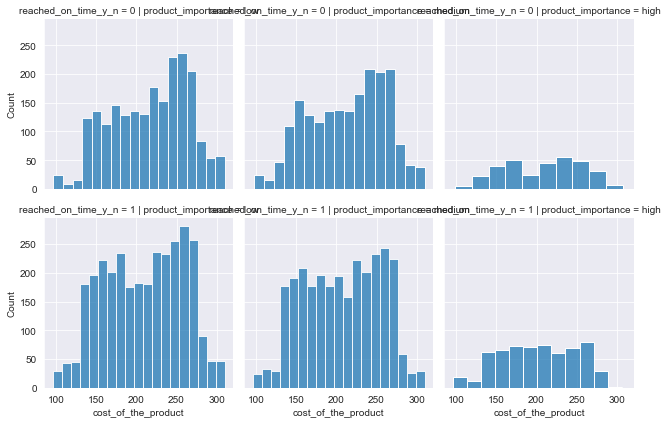

In [82]:
#the importance low, medium, high
#where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
#Cost of the Product in US Dollars
g = sns.FacetGrid(df, col='product_importance', row='reached_on_time_y_n')
g.map_dataframe(sns.histplot, x= 'cost_of_the_product');


In [140]:
# 1. We Create X & Y 

X = df.drop(['reached_on_time_y_n'], axis=1)
y = df['reached_on_time_y_n']

#2. Create Dummies for Categorical COls
X = pd.get_dummies(X, drop_first=True)

#3. Split data into Train vs Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [91]:
y_train = df['reached_on_time_y_n']
X_train = df.drop(['reached_on_time_y_n'], axis=1)
print(type(y_train))
print(y_train.value_counts())

<class 'pandas.core.series.Series'>
1    6563
0    4436
Name: reached_on_time_y_n, dtype: int64


In [109]:
scaler = StandardScaler()
feats = ['cost_of_the_product', 'discount_offered', 'weight_in_gms']
for ft in feats:
    scaled = scaler.fit_transform(X_train[[ft]])
    X_train[ft] = scaled.flatten()

X_train.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
0,1,4,2,4,2,-0.690722,3,1,1,1.889983,-1.468240
1,2,5,2,4,5,0.120746,2,1,0,2.815636,-0.333893
2,3,1,2,2,2,-0.565881,4,1,0,2.136824,-0.159002
3,4,2,2,3,3,-0.711529,4,2,0,-0.208162,-1.502484
4,5,3,2,2,2,-0.545074,3,2,1,2.013404,-0.703244


In [103]:
cat_features = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']
for cat in cat_features:
    print(cat, ':', set(X_train[cat]))

warehouse_block : {'B', 'A', 'F', 'C', 'D'}
mode_of_shipment : {'Ship', 'Flight', 'Road'}
product_importance : {'low', 'medium', 'high'}
gender : {'F', 'M'}


In [138]:
X_train['warehouse_block'] = X_train['warehouse_block'].map(wb_map)
X_train['mode_of_shipment'] = X_train['mode_of_shipment'].map(sp_map)
X_train['product_importance'] = X_train['product_importance'].map(imp_map)
X_train['gender'] = X_train['gender'].map(sex_map)

X_train.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
0,1,5,None,4,2,-0.690722,3,None,0,1.889983,-1.468240
1,2,5,None,4,5,0.120746,2,None,0,2.815636,-0.333893
2,3,5,None,2,2,-0.565881,4,None,0,2.136824,-0.159002
3,4,5,None,3,3,-0.711529,4,None,0,-0.208162,-1.502484
4,5,5,None,2,2,-0.545074,3,None,0,2.013404,-0.703244


In [145]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
# 1. Create object 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred)*100, 
                                  f1_score(y_test,y_pred) *100
))


The Model Accuracy is 65.27%,      Recall is 67.77%, Percision is 72.14%,       F1-Score is 69.88% 


In [143]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train,y_train )
dt_y_pred = dt_model.predict(X_test)
#Model Score
from sklearn.metrics import accuracy_score
print('The decision Tree model accuracy score was {}% on test dataset'.format(round(accuracy_score(dt_y_pred, y_test)*100)))


The decision Tree model accuracy score was 65% on test dataset
